# Library importing

In [1]:
%matplotlib inline 

import dash
import dash_core_components as dcc
import dash_html_components as html

import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import json
from datetime import *

In [2]:
from pymongo import MongoClient
uri='mongodb://localhost'
client=MongoClient(uri)
db=client['CodeManekineko']

In [3]:
c_stock=db['StockList']

In [4]:
c_stock.count()

751

# Input target stock id here

In [5]:
stock_id='600298'

In [6]:
# Find the stock document
stock = c_stock.find_one({'stock_id':stock_id})
print(stock)

{'totals': 8.24, 'reserved': 65197.44, 'related_articles': [{'url': 'http://finance.sina.com.cn/stock/marketresearch/2017-03-15/doc-ifycnpit1952790.shtml', 'article_name': '涨停板早知道：七大利好明日有望发酵'}, {'url': 'http://finance.sina.com.cn/stock/marketresearch/2017-03-14/doc-ifychhuq4412854.shtml', 'article_name': '东阿阿胶美的集团等再创新高 二线蓝筹望迎新机遇'}, {'url': 'http://finance.sina.com.cn/roll/2017-03-14/doc-ifychihc6447882.shtml', 'article_name': '重视大趋势 强调价值投资'}, {'url': 'http://finance.sina.com.cn/roll/2017-03-17/doc-ifycnpvh4706264.shtml', 'article_name': 'QFII重仓股年内浮盈6.42亿 5个季度坚守10只个股'}], 'stock_name': '安琪酵母', 'outstanding': 8.11, 'timeToMarket': datetime.datetime(2000, 8, 18, 0, 0), 'reservedPerShare': 0.79, 'pe': 32.19, 'history_data': [{'date': datetime.datetime(2017, 6, 5, 0, 0), 'close': 22.81, 'low': 22.47, 'open': 22.53, 'high': 22.99, 'volume': 6944436.0, 'amount': 158231778.0}, {'date': datetime.datetime(2017, 6, 2, 0, 0), 'close': 22.59, 'low': 22.18, 'open': 22.76, 'high': 22.92, 'volume': 819

In [7]:
df=pd.DataFrame(list(stock['history_data']))

In [10]:
candlestick = {
            'x': df['date'],
            'open': df['open'],
            'high': df['high'],
            'low': df['low'],
            'close': df['close'],
            'type': 'candlestick',
            'name': '27017',
            'legendgroup': '27017',
        }

In [11]:
import plotly.figure_factory as ff
import plotly.plotly as py

table = ff.create_table(df)
py.iplot(table, file)

In [8]:
# Get report data as dataframe
report_data=stock['report_data']
operation_data=stock['operation_data']
profit_data=stock['profit_data']
debtpaying_data=stock['debtpaying_data']
growth_data=stock['growth_data']
cashflow_data=stock['cashflow_data']

In [9]:
df_cashflow_data=DataFrame.from_dict(cashflow_data)
df_report_data=DataFrame.from_dict(report_data)
df_operation_data=DataFrame.from_dict(operation_data)
df_profit_data=DataFrame.from_dict(profit_data)
df_growth_data=DataFrame.from_dict(growth_data)
df_debtpaying_data=DataFrame.from_dict(debtpaying_data)

In [10]:
df_history_data=DataFrame.from_dict(stock['history_data'])


In [25]:
DataFrame.to_excel(df_report_data)

TypeError: to_excel() missing 1 required positional argument: 'excel_writer'

In [11]:
df_history_data.sort_values('date').head()

,amount,close,date,high,low,open,volume
3991,675590800.0,3.97,2000-08-18,4.08,3.67,3.67,22387200.0
3990,171316348.0,3.90,2000-08-21,4.01,3.88,3.93,5588600.0
3989,77402892.0,3.79,2000-08-22,3.91,3.79,3.90,2592400.0
3988,92110514.0,3.72,2000-08-23,3.85,3.63,3.76,3184900.0
3987,47679265.0,3.79,2000-08-24,3.82,3.69,3.73,1631400.0


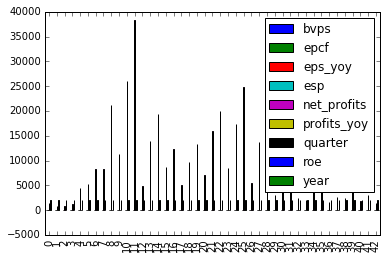

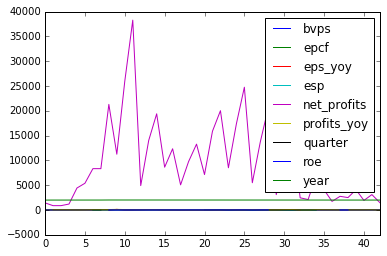

In [12]:
df_report_data.head(60).plot(kind='bar')
plt.show(df_report_data.plot())